# 1- Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,10)},font_scale=1.2)
sns.set_palette('viridis')

# 2-Reading the dataset

In [2]:
df = pd.read_csv("black_friday.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.isnull().sum() * 100 / len(df)

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

**We can see that about 31% of Product_Category_2 is missing and 69% of Product_Category_3 is missing too**

**We can drop User_ID and Product_ID columns as they won't be useful**

In [5]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [7]:
df.describe(include='all')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [8]:
#Converting Marital Status column to be numerical
df['Marital_Status'] = df['Marital_Status'].astype('int64')

# 3-Data Visualization

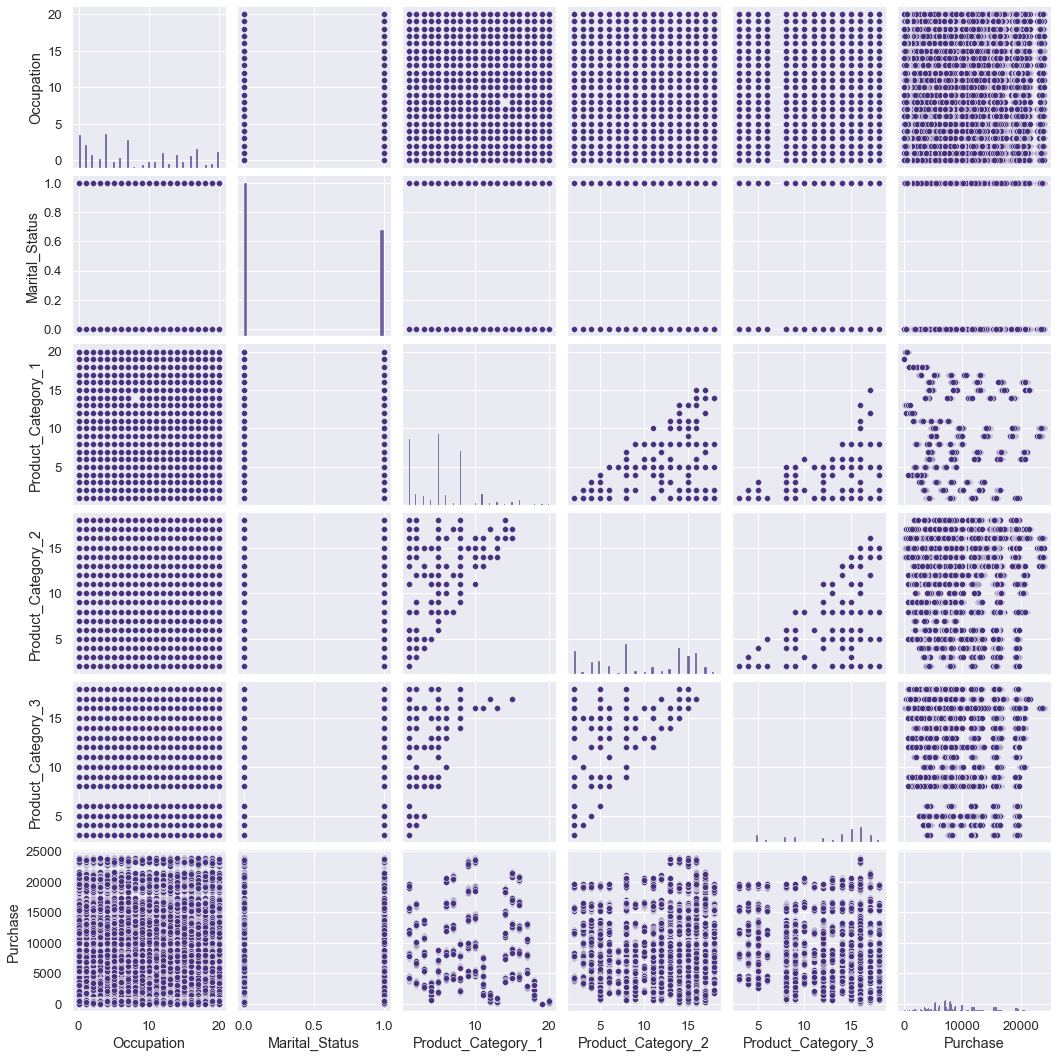

In [9]:
sns.pairplot(df)

<AxesSubplot:>

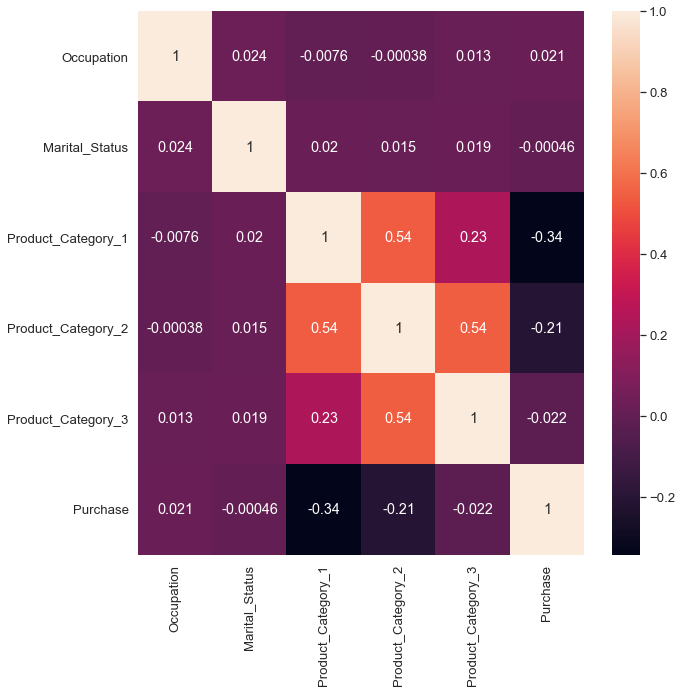

In [10]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

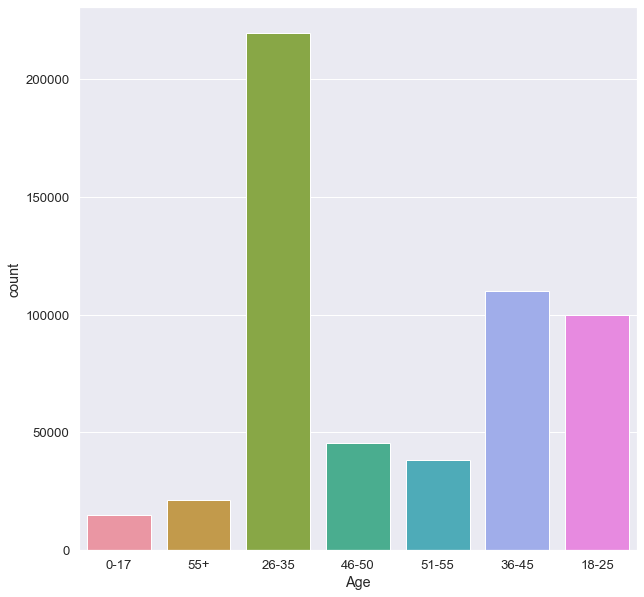

In [11]:
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

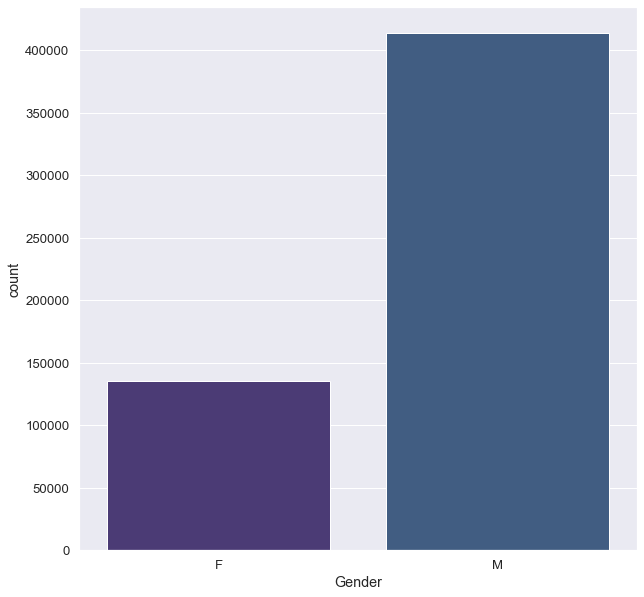

In [12]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

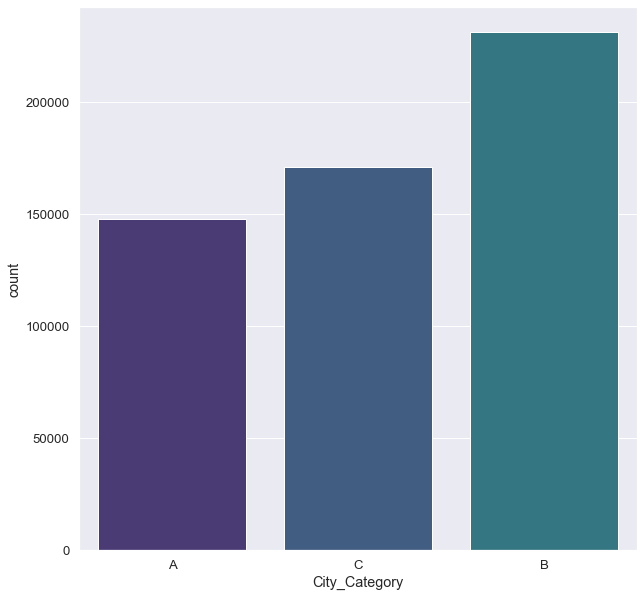

In [13]:
sns.countplot(df['City_Category'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

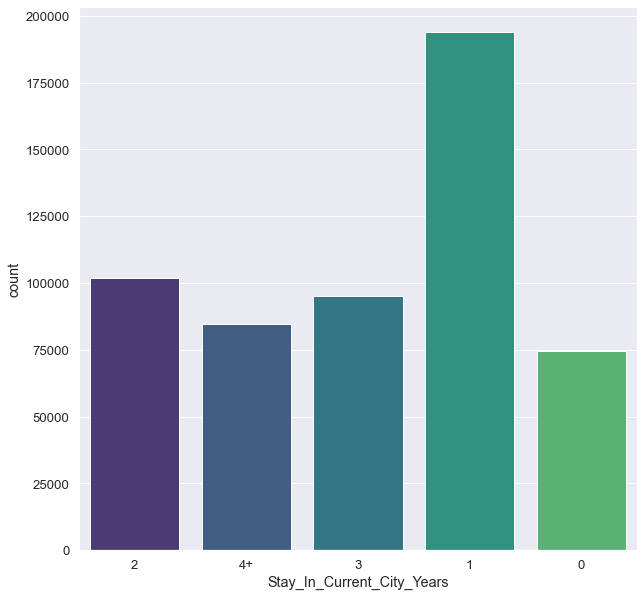

In [14]:
sns.countplot(df['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

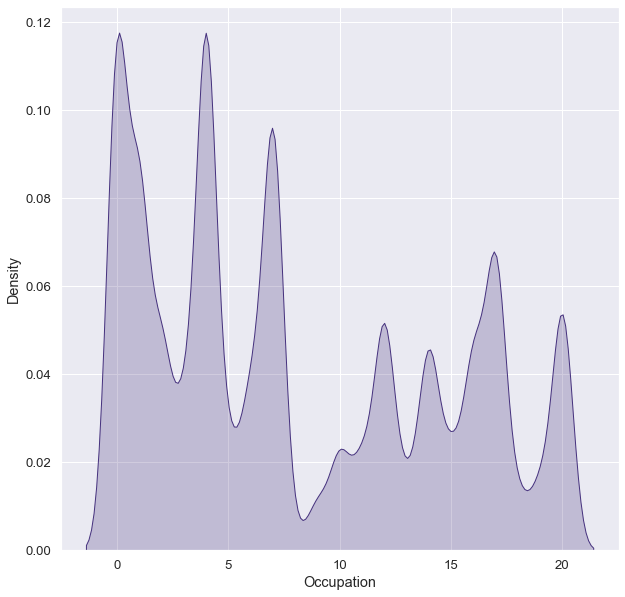

In [15]:
sns.kdeplot(df['Occupation'],shade=True)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Density'>

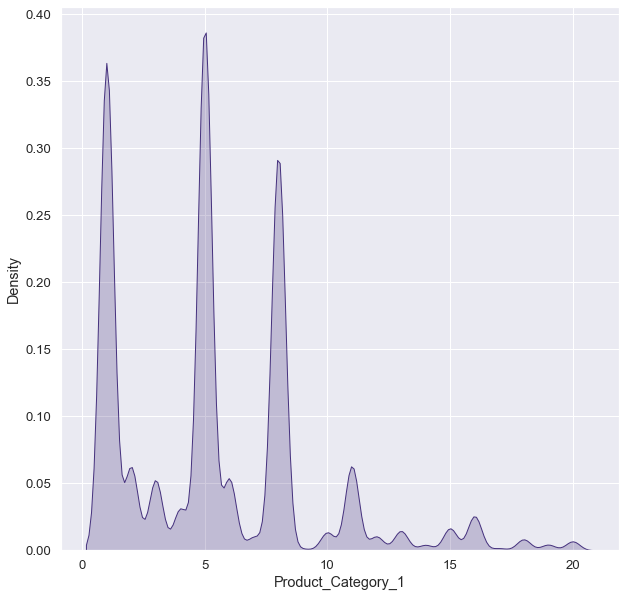

In [16]:
sns.kdeplot(df['Product_Category_1'],shade=True)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Density'>

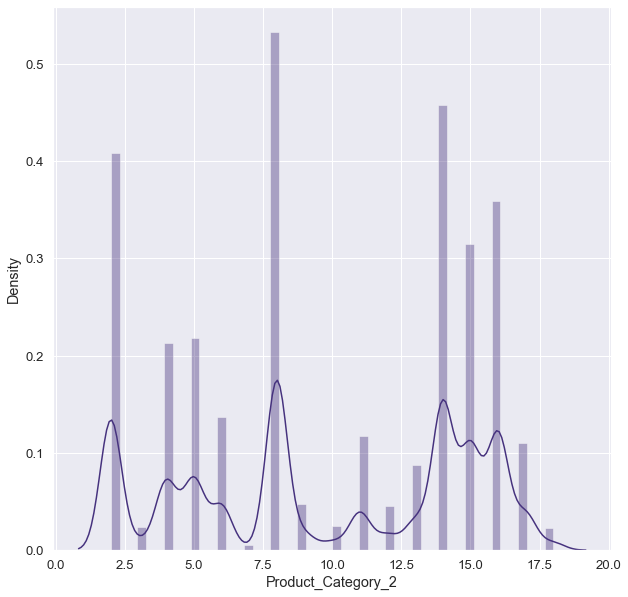

In [17]:
sns.distplot(df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='Density'>

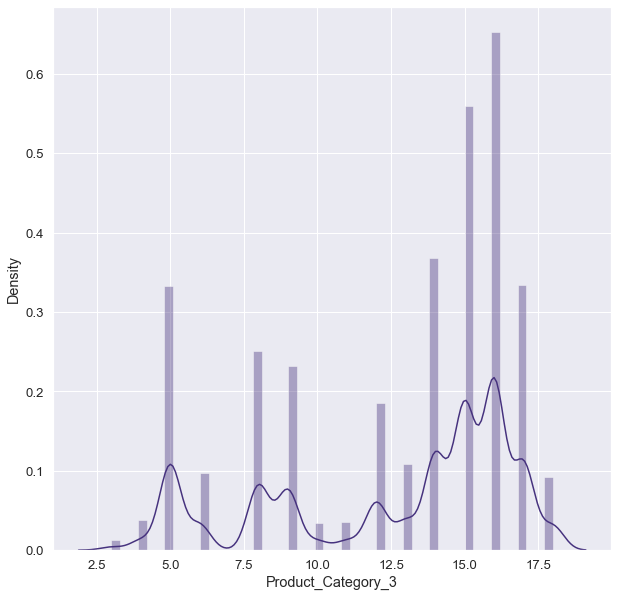

In [18]:
sns.distplot(df['Product_Category_3'])

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

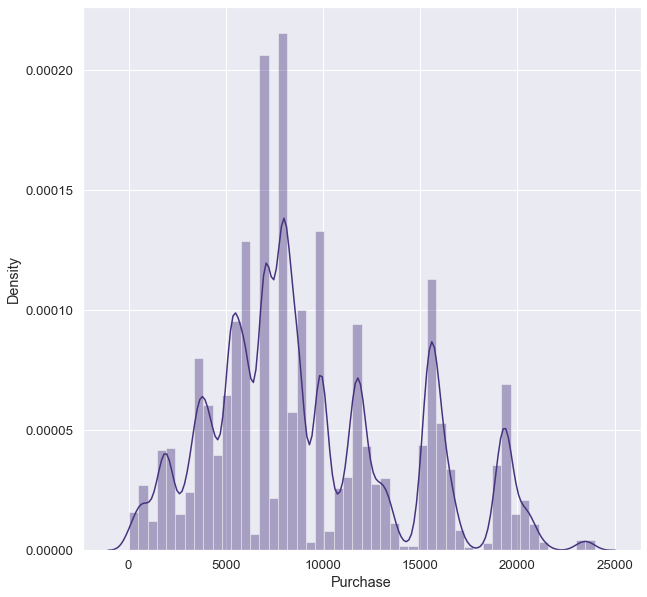

In [19]:
sns.distplot(df['Purchase'])

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

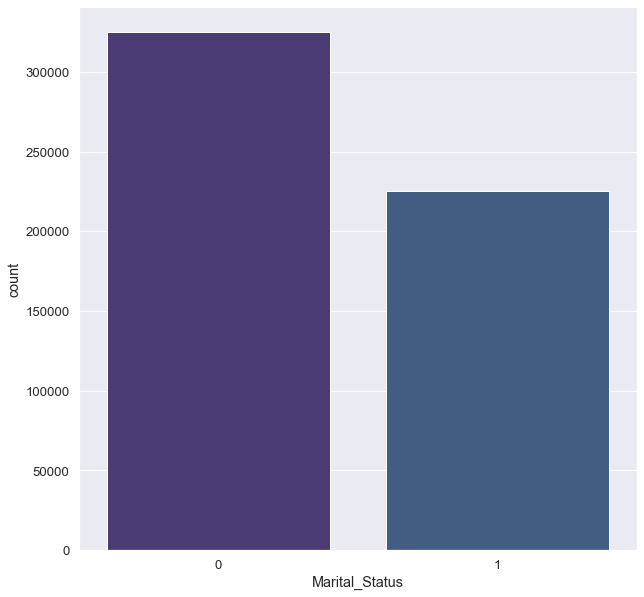

In [20]:
sns.countplot(df['Marital_Status'])

<AxesSubplot:xlabel='Age', ylabel='count'>

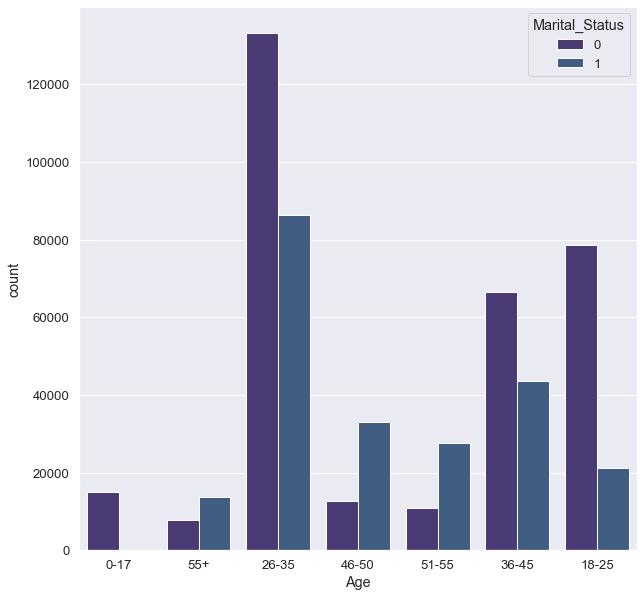

In [21]:
sns.countplot(df['Age'],hue=df['Marital_Status'])

**Ages of 0-17, 26-35, 36-45 and 18-25 are most of unmarried status**

<AxesSubplot:xlabel='Gender', ylabel='count'>

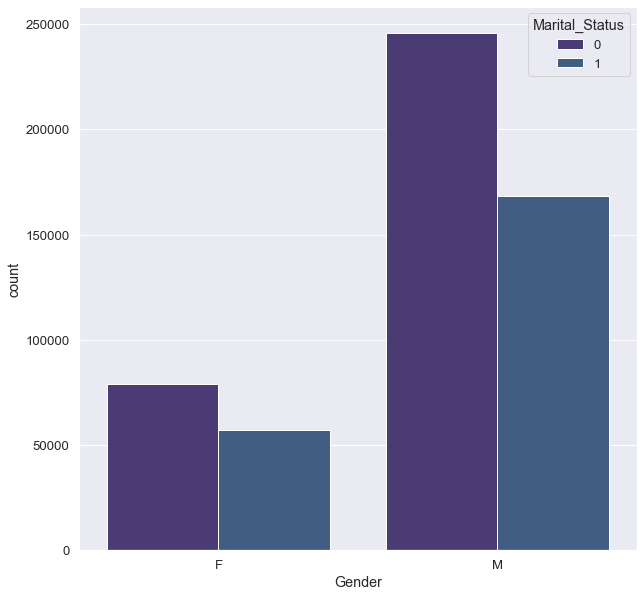

In [22]:
sns.countplot(df['Gender'],hue=df['Marital_Status'])

**Most of females and males in this dataset are unmarried**

<AxesSubplot:xlabel='Age', ylabel='count'>

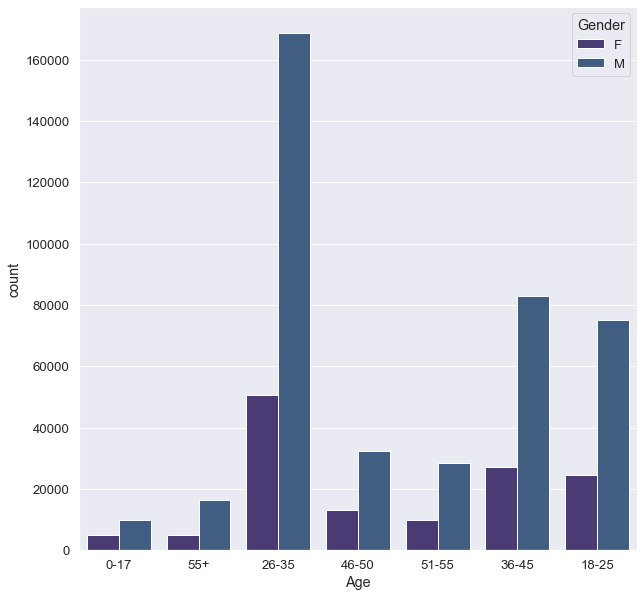

In [23]:
sns.countplot(df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

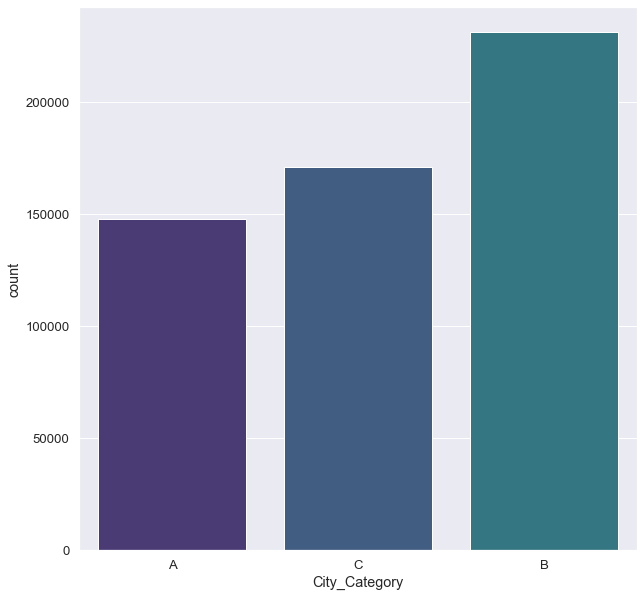

In [24]:
sns.countplot(df['City_Category'])

<AxesSubplot:xlabel='Age', ylabel='count'>

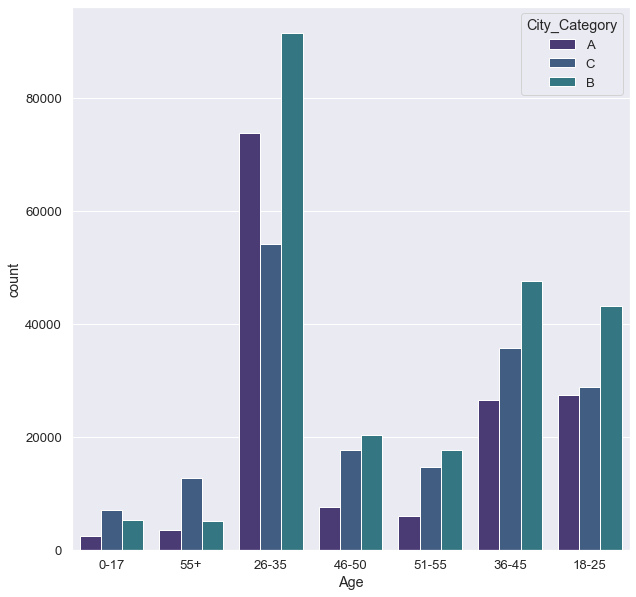

In [25]:
sns.countplot(df['Age'],hue=df['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

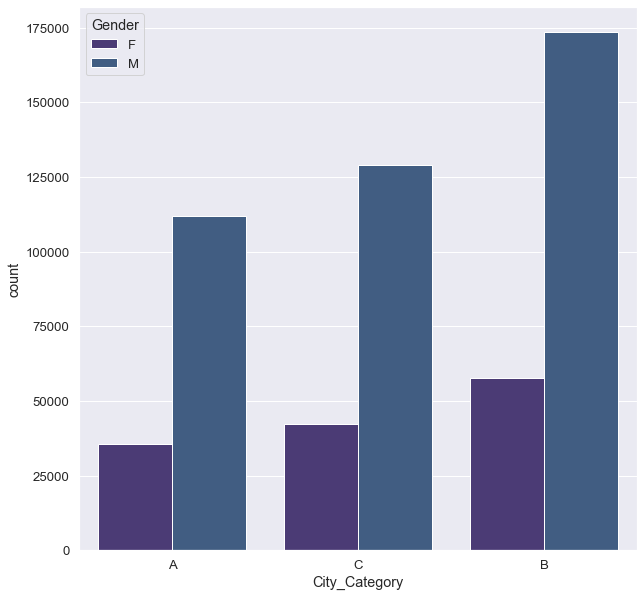

In [26]:
sns.countplot(df['City_Category'],hue=df['Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

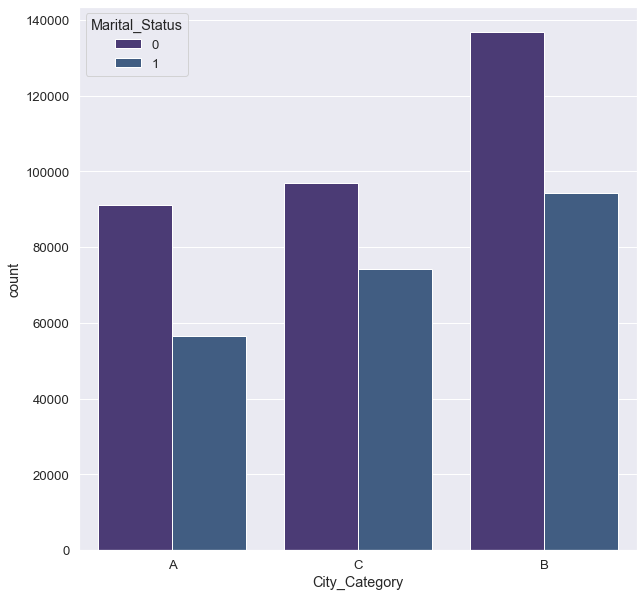

In [27]:
sns.countplot(df['City_Category'],hue=df['Marital_Status'])

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

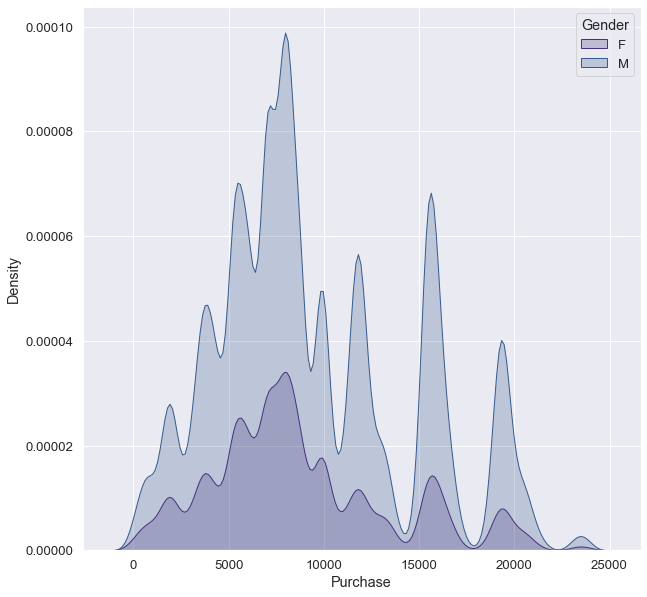

In [28]:
sns.kdeplot(df['Purchase'],hue=df['Gender'],shade=True)

**The purchase in males is much higher than females**

## Filling missing values

In [29]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)

## Getting dummies

In [30]:
df = pd.get_dummies(df,columns=['Age'])

## Mapping the Gender

In [31]:
Gender = {'M':1,'F':0}

In [32]:
df['Gender'] = df['Gender'].map(Gender)

In [33]:
Category = {'A':1,'B':2,'C':3}

In [34]:
df['City_Category'] = df['City_Category'].map(Category)

## Detecting outliers

In [35]:
outliers = ds.structdata.detect_outliers(df,0,['Occupation','Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase','Gender','City_Category'])

# 4- Training 

In [36]:
no_outlier = df[~df.index.isin(outliers)]

In [37]:
x = no_outlier.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
y = no_outlier['Purchase']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [40]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [41]:
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [42]:
for model in models:
    print(f'Model {model}')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f'R2 Score is {r2_score(y_pred,y_test)}')
    print(f'Mean Squared Error is {mean_squared_error(y_pred,y_test)}')
    print(f'Model score is {model.score(x_test,y_test)}')

Model LinearRegression()
R2 Score is 8.612897062221236e-10
Mean Squared Error is 2.2837445474793992e+22
Model score is -1099847891449947.4
Model DecisionTreeRegressor()
R2 Score is 0.48287579586052254
Mean Squared Error is 7690895.071782053
Model score is 0.6296076661727161
Model RandomForestRegressor()
R2 Score is 0.4927798436727936
Mean Squared Error is 7362753.559318486
Model score is 0.645410911372736
